# Project 2: Build a Traffic Sign Recognition Classifier

This project is to take German traffic sign data, loaded as 32x32 color images, and classify them properly. Data provided as input is 
- training dataset (35k images)
- Validation dataset (4k images)
- and Test dataset (12.6k images)

The task is to train and repeatedly test on the validation dataset, but try on the test dataset only once.This python notebook will attempt to go through each step
1.  setting up loading 
2.  Visualizing the data
3.  normalizing images
4.  setting up the convolutional neural network,
5.  calculating a cost function and validation accuracy   (using adams optimizer)
6.  And running over multiple EPOCHS and batches till adjust weights converge to 1 (or as close as possible)

I will then attempt to train new traffic images loaded off the web with this classifier once this is done.


## 1. Load Data



In [1]:
#from tensorflow.examples.tutorials.mnist import input_data
import pickle
import pandas as pd
import numpy as np
training_file = 'traffic-sign-data/train.p'
validation_file='traffic-sign-data/valid.p'
testing_file = 'traffic-sign-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print('All Test, Training, Validation Images Loaded')

All Test, Training, Validation Images Loaded


## Step 2: Dataset Summary & Exploration

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
print('Training Images = '+ str(X_train.shape[0]))
print('Validation Images = '+ str(X_valid.shape[0]))
print('Test Images = '+ str(X_test.shape[0]))
print('Image Resolution x:'+ str(X_train.shape[1]) +" y: "+ str(X_train.shape[2]) + ' Color Channels: ' + str(X_train.shape[3]))


n_train = X_train.shape [0]

# TODO: Number of validation examples
n_validation = X_valid.shape [0]

# TODO: Number of testing examples.
n_test = X_test.shape [0]

# TODO: What's the shape of an traffic sign image?
image_shape = [X_test.shape [1], X_test.shape [2]]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))
# Can look at train, test and valid sets to verify 

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Training Images = 34799
Validation Images = 4410
Test Images = 12630
Image Resolution x:32 y: 32 Color Channels: 3
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


## Visualize Data

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

Tried to look at histogram of output for each dataset

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


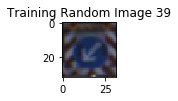

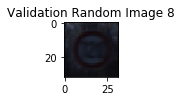

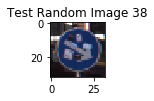

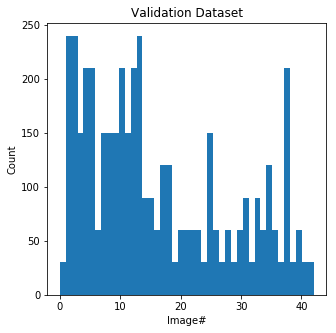

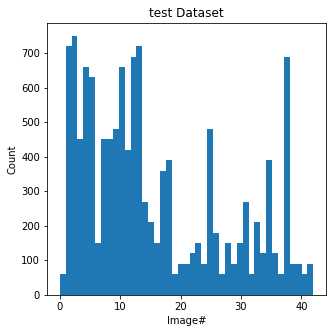

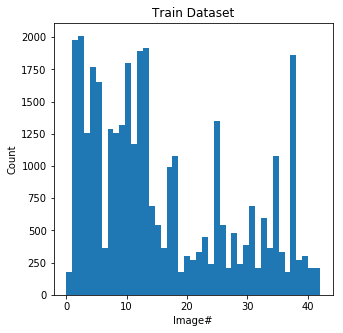

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
print(image.shape)
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
plt.title("Training Random Image " +str(y_train[index]))
#print(y_train[index])

index = random.randint(0, len(X_valid))
image = X_valid[index].squeeze()
print(image.shape)
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
plt.title("Validation Random Image " +str(y_valid[index]))
#print(y_train[index])


index = random.randint(0, len(X_test))
image = X_test[index].squeeze()
print(image.shape)
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
plt.title("Test Random Image " +str(y_test[index]))

plt.figure(figsize=(5,5))
plt.hist(y_valid,n_classes)
plt.title('Validation Dataset')
plt.xlabel('Image#')
plt.ylabel('Count')

plt.figure(figsize=(5,5))
plt.hist(y_test,n_classes)
plt.title('test Dataset')
plt.xlabel('Image#')
plt.ylabel('Count')

plt.figure(figsize=(5,5))
plt.hist(y_train,n_classes)
plt.title('Train Dataset')
plt.xlabel('Image#')
plt.ylabel('Count')

Observe that roughly the same proportion of Images are found in Test, Training, and Validaiton Dataset

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation used in the classroom was what I used.  I played with the mean and sigma, but didn't observe a significant difference 

I was able to get to .935 validation accuracy with 50 Epochs with the LeNet implementation as advertised.  

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
   =>  network seems to be overfitting since the validaiton performs better than test.  
       likely want to add with some fake data to orient labels around
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
      This I did, I used the luminance function to manually convert to greyscale
- Number of examples per label (some have more than others).
       Observing the training data, the speed limit signs have the best training dataset
- Generate fake data.
    =>  Will try this

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#  Found this in stack overflow converts rGB counts to Luminance
#  Credit to https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    a= np.dot(rgb[...,:3], [0.299, 0.587, 0.114]) 
    return np.reshape(a, a.shape + (1,))

def normalize(greyscale):
    return (greyscale-128)/128

#  Create three new lists, of training, test, and validation image data.  Units are 32x32 per elemenent in the list
train_norm= []
test_norm = []
valid_norm = []

for i in range(n_train):
    yp =  normalize(rgb2gray(X_train[i]))
    train_norm.append(yp)
print('Greyscale and normalized Training image data ' + str(len(train_norm)))

for i in range(n_validation):
    yp = normalize(rgb2gray(X_valid[i]))
    valid_norm.append(yp)
print('Greyscale and normalized validation image data done ' + str(len(valid_norm)))

for i in range(n_test):
    yp = normalize(rgb2gray(X_test[i]))
    test_norm.append(yp)
print('Greyscale and normalized test image data done '+str(len(test_norm)))

Greyscale and normalized Training image data 34799
Greyscale and normalized validation image data done 4410
Greyscale and normalized test image data done 12630


(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
9.712


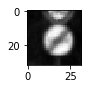

In [7]:
image = test_norm[0]
print(image.shape)
image = train_norm[0]
print(image.shape)
image = valid_norm[0]
print(image.shape)
plt.figure(figsize=(1,1))
plt.imshow(image.squeeze(), cmap="gray")

print(np.min(rgb2gray(X_valid[0])))

.

## 4 Architecture


Adapted the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since I converted trffic sign images to grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Used RELU activation

**Pooling.** The output shape is 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Used RELU (rectified Linear)

**Pooling.** The output shape is 5x5x16.

**Flatten.** Flattened the output shape of the final pooling layer such that it's 1D instead of 3D. Used `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Used RELU activation (rectified Linear)

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Used ReLU activation (rectified Linear)

**Layer 5: Fully Connected (Logits).** This should have 43 outputs - same as unique classifiers identified in training

### Output
Return the result of the 2nd fully connected layer.

In [8]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0.0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.


In [9]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

Used Adams optimizer - adaptive moment optimization using exponential moving average of gradients
Slightly different than gradient descent that uses a single learning rate

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [11]:
from sklearn.utils import shuffle
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset.
train_norm , test_norm, valid_norm.  Feed through batches of 128 and EPOCHS given above.  

I used 50 EPOCHS to get to an acceptable validation accuracy > 93%  


In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model. Before each epoch, shuffle the training set.
After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.


In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training the Model with " + str(num_examples))
    print()
    for i in range(EPOCHS):
        train_norm, y_train = shuffle(train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training the Model with 34799

EPOCH 1 ...
Validation Accuracy = 0.740

EPOCH 2 ...
Validation Accuracy = 0.836

EPOCH 3 ...
Validation Accuracy = 0.884

EPOCH 4 ...
Validation Accuracy = 0.889

EPOCH 5 ...
Validation Accuracy = 0.899

EPOCH 6 ...
Validation Accuracy = 0.884

EPOCH 7 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.897

EPOCH 9 ...
Validation Accuracy = 0.908

EPOCH 10 ...
Validation Accuracy = 0.908

EPOCH 11 ...
Validation Accuracy = 0.903

EPOCH 12 ...
Validation Accuracy = 0.918

EPOCH 13 ...
Validation Accuracy = 0.929

EPOCH 14 ...
Validation Accuracy = 0.912

EPOCH 15 ...
Validation Accuracy = 0.912

EPOCH 16 ...
Validation Accuracy = 0.916

EPOCH 17 ...
Validation Accuracy = 0.917

EPOCH 18 ...
Validation Accuracy = 0.918

EPOCH 19 ...
Validation Accuracy = 0.929

EPOCH 20 ...
Validation Accuracy = 0.927

EPOCH 21 ...
Validation Accuracy = 0.930

EPOCH 22 ...
Validation Accuracy = 0.934

EPOCH 23 ...
Validation Accuracy = 0.934

EPOCH 24 ...

### Validation Accuracy Evaluation
Overall Accuracy

My final model results were:

training set accuracy of 1
validation set accuracy of .938
test set accuracy of .919  (see below)

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting

## 6.  Evaluate the Model

Evaluate the model on Test data, did this only once to not infect the training dataset with testset data

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.920


## 7. Load in new traffic signs 

Calculate the accuracy for these 5 new images. 
For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [15]:
import pandas as pd
signs = pd.read_csv('signnames.csv',delimiter=',')
signs

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


['Stop', 'Speed limit (60km/h)', 'No entry', 'General caution', 'Children crossing']


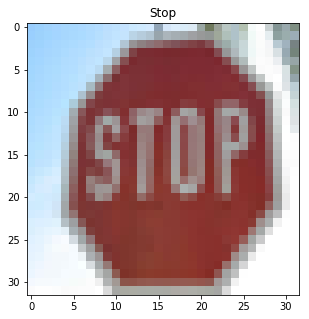

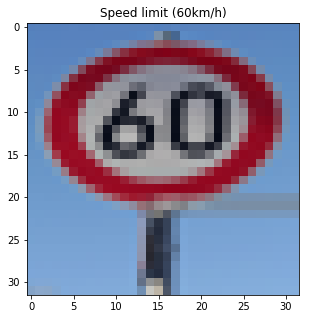

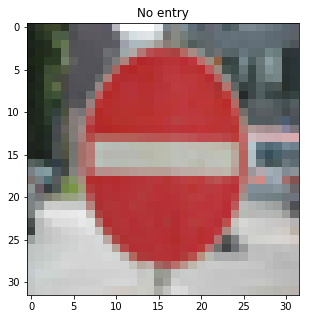

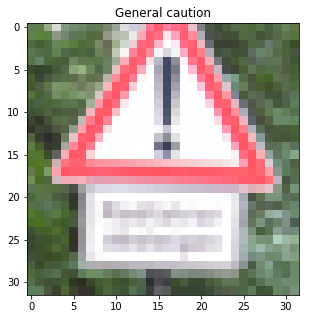

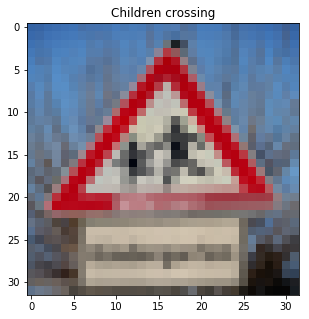

In [21]:
#  Load in 5 new images, inspect labels applied by me to verify visually
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
images = ['Stop_Sign.jpg',\
          'speed_limit.jpg',\
        'Do-Not-Enter.jpg', \
		'RadfahrerAbsteigen.jpg',\
		'Watch_for_Children.jpg']

# Mark Labels from looking at the images (human intelligence)
labels = [14,3,17,18,28]
labelnames = []
newimages_norm = []
#Show label we want
from scipy import misc
for  i in range(len(images)):
    im = misc.imread('NewSigns/'+images[i])
    resized_image = misc.imresize(im, (32, 32),interp='bicubic') 
    yp =  normalize(rgb2gray(resized_image))
    newimages_norm.append(yp)
    plt.figure(figsize=(5,5))
    plt.imshow(resized_image.squeeze())
    plt.title(signs.iloc[labels[i]] [1])
    labelnames.append(signs.iloc[labels[i]] [1])
    
print(labelnames)

In [25]:
newimages_norm[0].shape
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    for i in range(len(labels)):
        print('Image ' + str(i))
        testimages = []
        l = []
        testimages.append(newimages_norm[i])
        l.append(labels[i])
        test_accuracy = evaluate(testimages, l)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

Image 0
Test Accuracy = 1.000
Image 1
Test Accuracy = 0.000
Image 2
Test Accuracy = 1.000
Image 3
Test Accuracy = 0.000
Image 4
Test Accuracy = 0.000


In [31]:
softmax_logits = tf.nn.softmax(logits)
#top_5 = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    probs = sess.run(softmax_logits, feed_dict={x: newimages_norm, y: labels})
    my_top5 = sess.run(tf.nn.top_k(tf.constant(probs), k=5))
    #my_top5= sess.run(top_5, feed_dict={x: newimages_norm, y: labels})

print(my_top5[0])
print(my_top5[1] )


for i in range(len(labels)):
    #print('Sign' + str(i) + ' Prediction: ' + 
    #im = misc.imread('NewSigns/'+images[i])
    #plt.figure(figsize=(5,5))
    #plt.imshow(im.squeeze())
    print(images[i])
    for j in range(5):
        print(signs.iloc[my_top5[1][i][j]] [1] + 'Probability' + str(my_top5[0][i][j]))
    print()


[[  9.99999285e-01   4.42543296e-07   1.55204702e-07   7.13569577e-08
    6.11136741e-09]
 [  9.99895334e-01   9.38303783e-05   8.63144305e-06   1.85092142e-06
    1.47115500e-07]
 [  1.00000000e+00   3.34335676e-20   5.10890940e-21   1.10905553e-21
    6.04740618e-22]
 [  9.99965549e-01   3.39800536e-05   5.04199875e-07   5.30192956e-09
    4.01927247e-09]
 [  9.99983072e-01   1.67906455e-05   1.20677143e-07   5.46322321e-10
    3.32935540e-10]]
[[14  4 33  1 36]
 [17  9 22 12 34]
 [17 30 33 14 12]
 [23 10 17 33  9]
 [38  1 20 26 18]]
Stop_Sign.jpg
StopProbability0.999999
Speed limit (70km/h)Probability4.42543e-07
Turn right aheadProbability1.55205e-07
Speed limit (30km/h)Probability7.1357e-08
Go straight or rightProbability6.11137e-09

speed_limit.jpg
No entryProbability0.999895
No passingProbability9.38304e-05
Bumpy roadProbability8.63144e-06
Priority roadProbability1.85092e-06
Turn left aheadProbability1.47116e-07

Do-Not-Enter.jpg
No entryProbability1.0
Beware of ice/snowProbabili

     Actual         Prediction     Comments
 1. StopSign        Stop sign
 2. SpeedLimit      No entry       
 3. No Entry        No Entry
 4. General Caution Slippry Road    Possible human misinterpretation of sign
 5.  Children Crossing  Keep Right  Poor Resizing/Scaling leads to turn right sign

# Discussion  of new signs poor classification

This was definitely much lower prediction accuracy than I expected. Only 2 of 5 were correct.  Even worse, the missed signs were no where near the accurate prediction.  I suspect a few errors
1.  Poor resizing and cropping
2.  Use of Greyscale normalization doesn't work as well in compressed (jpg) images


The other thing I don't understand is why no other of the top five probabilities are close.  This seems odd.


